<a href="https://colab.research.google.com/github/Saidbey/Supermarket-visualization/blob/main/Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/sotuvlar.csv")
# 
# 
# df.sort('Date')
df = df.sort_values(by="Date", key=pd.to_datetime)
# df = df.set_index("Date", drop = True)
df["Date"] = pd.to_datetime(df.Date)
# df['month_day'] = df["Date"].apply(lambda x: x.strftime('%m-%d'))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


17 ta ustun haqida ma'lumot:
Invoice id - Joriy sotuv idsi (kompyuter generatsiya qilgan raqam)
Branch - Fillial (A,B yoki C)
City - Joylashgan shahar
Customer type - Mijoz turui - Member(Maxsus klent - karta ochtirgan), Normal - Oddiy klent
Gender - Jinsi
Product line - Sotib olingan mahsulot qaysi bo'limga tegishli:  Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price - Bir birlik mahsulot narxi
Quantity - Sotib olingan mahsulot soni
Tax - 5% li Soliq
Total - Soliqni qo'shgan holda  hisoblangan ummiy narx
Date - Sana
Time - Vaqt
Payment - To'lov turi (Cash-naqd, Credit-kredit karta, Ewallet-elektron hamyon)
COGS - Tannarxi
Gross margin percentage = (Jami daromad – sotilgan mahsulot tannarxi)/Jami daromad x 100
Gross income - yalpi daromad
rating - Reyting


In [5]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


In [6]:
mon = df.groupby("Date").sum()
yan, fev , mar = mon.iloc[0:31], mon.iloc[31:59], mon.iloc[59:91]
yan["Month"], fev["Month"], mar["Month"] = "January", "February", "March"
con = pd.concat([yan, fev, mar])
con = con.reset_index()
con



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
0,2019-01-01,659.95,81,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0,January
1,2019-01-02,357.08,48,92.6430,1945.5030,1852.86,38.095238,92.6430,48.4,January
2,2019-01-03,475.66,37,98.9585,2078.1285,1979.17,38.095238,98.9585,64.9,January
3,2019-01-04,310.46,32,77.3185,1623.6885,1546.37,28.571429,77.3185,39.1,January
4,2019-01-05,739.64,55,168.4135,3536.6835,3368.27,57.142857,168.4135,89.2,January
...,...,...,...,...,...,...,...,...,...,...
84,2019-03-26,558.64,52,93.4530,1962.5130,1869.06,61.904762,93.4530,86.1,March
85,2019-03-27,568.41,45,138.2295,2902.8195,2764.59,47.619048,138.2295,67.6,March
86,2019-03-28,455.25,48,106.1620,2229.4020,2123.24,47.619048,106.1620,70.5,March
87,2019-03-29,530.77,54,191.5830,4023.2430,3831.66,38.095238,191.5830,55.4,March


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14b78611d0>],
      dtype=object)

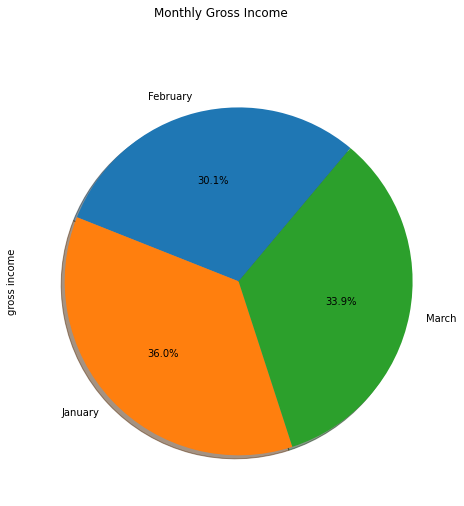

In [22]:
#Monthly income statistics
statm = con.groupby("Month")["gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(20,8), autopct='%1.1f%%', title = "Monthly Gross Income")
statm

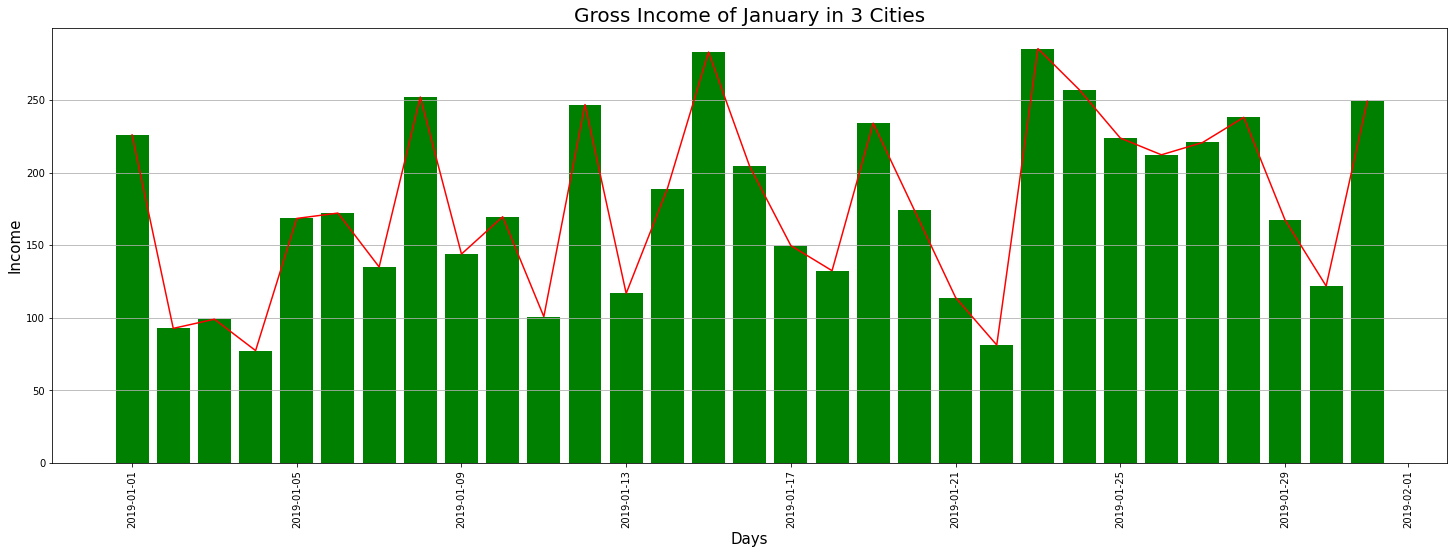

In [8]:
statj = con.loc[con["Month"] == "January"]
plt.figure(figsize=(25,8))
plt.plot(statj['Date'], statj['gross income'], color='red')
plt.xticks(rotation = 'vertical', size=10)
plt.xlabel("Days", size=15)
plt.ylabel("Income", size=15)
plt.title("Gross Income of January in 3 Cities", size = 20)
plt.bar(statj['Date'], statj['gross income'], color='green')
plt.grid(axis='y')
plt.show()


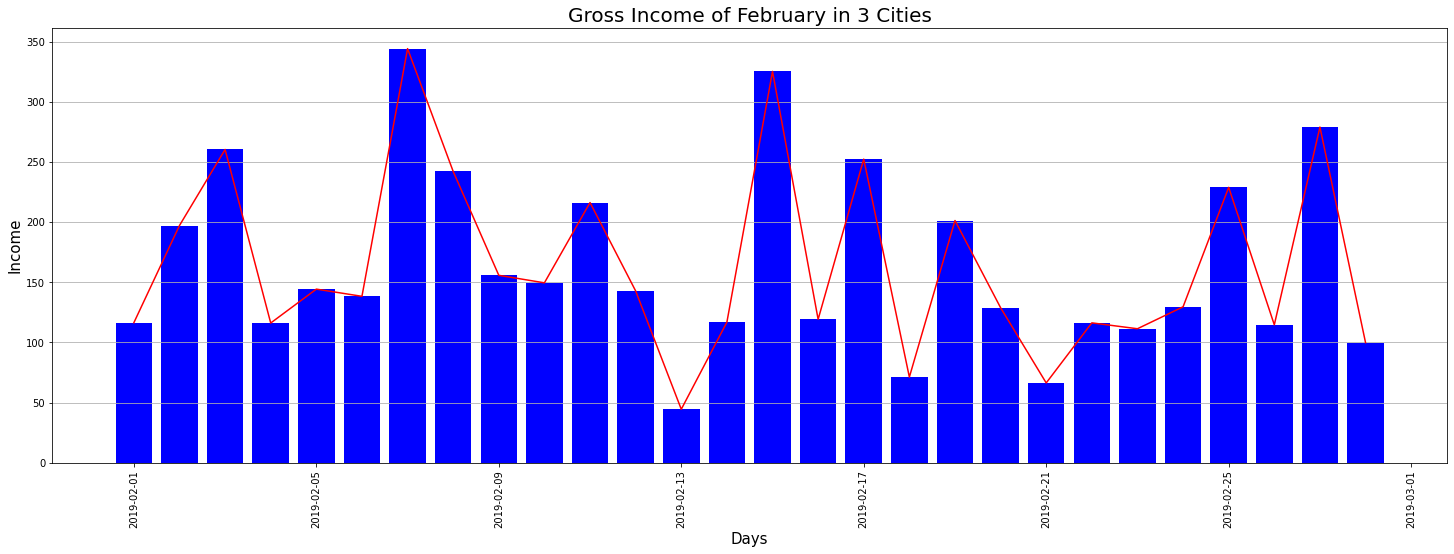

In [9]:
statf = con.loc[con['Month'] == "February"]
plt.figure(figsize=(25,8))
plt.plot(statf['Date'], statf['gross income'], color='red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel('Days', size=15)
plt.ylabel('Income', size=15)
plt.title("Gross Income of February in 3 Cities",size=20)
plt.bar(statf['Date'], statf['gross income'], color='blue')
plt.grid(axis='y')
plt.show()

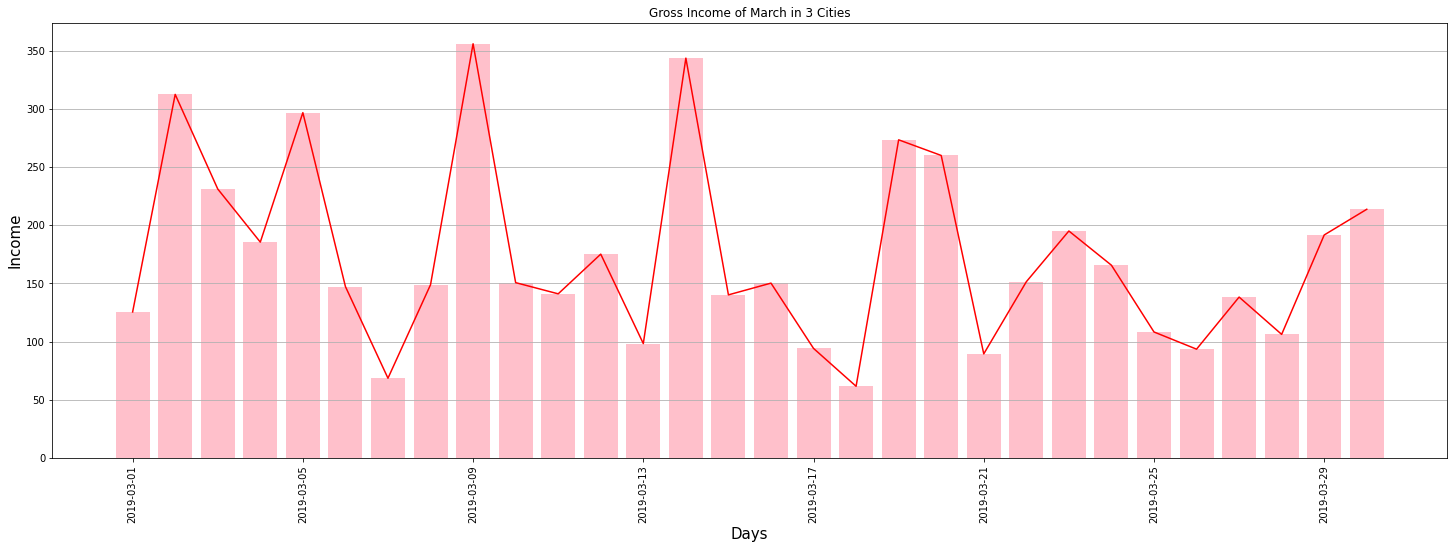

In [10]:
statm = con.loc[con['Month'] == 'March']
plt.figure(figsize=(25,8))
plt.plot(statm['Date'], statm['gross income'], color='red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel("Days", size=15)
plt.ylabel('Income', size=15)
plt.title('Gross Income of March in 3 Cities')
plt.bar(statm['Date'], statm['gross income'], color='pink')
plt.grid(axis='y')
plt.show()

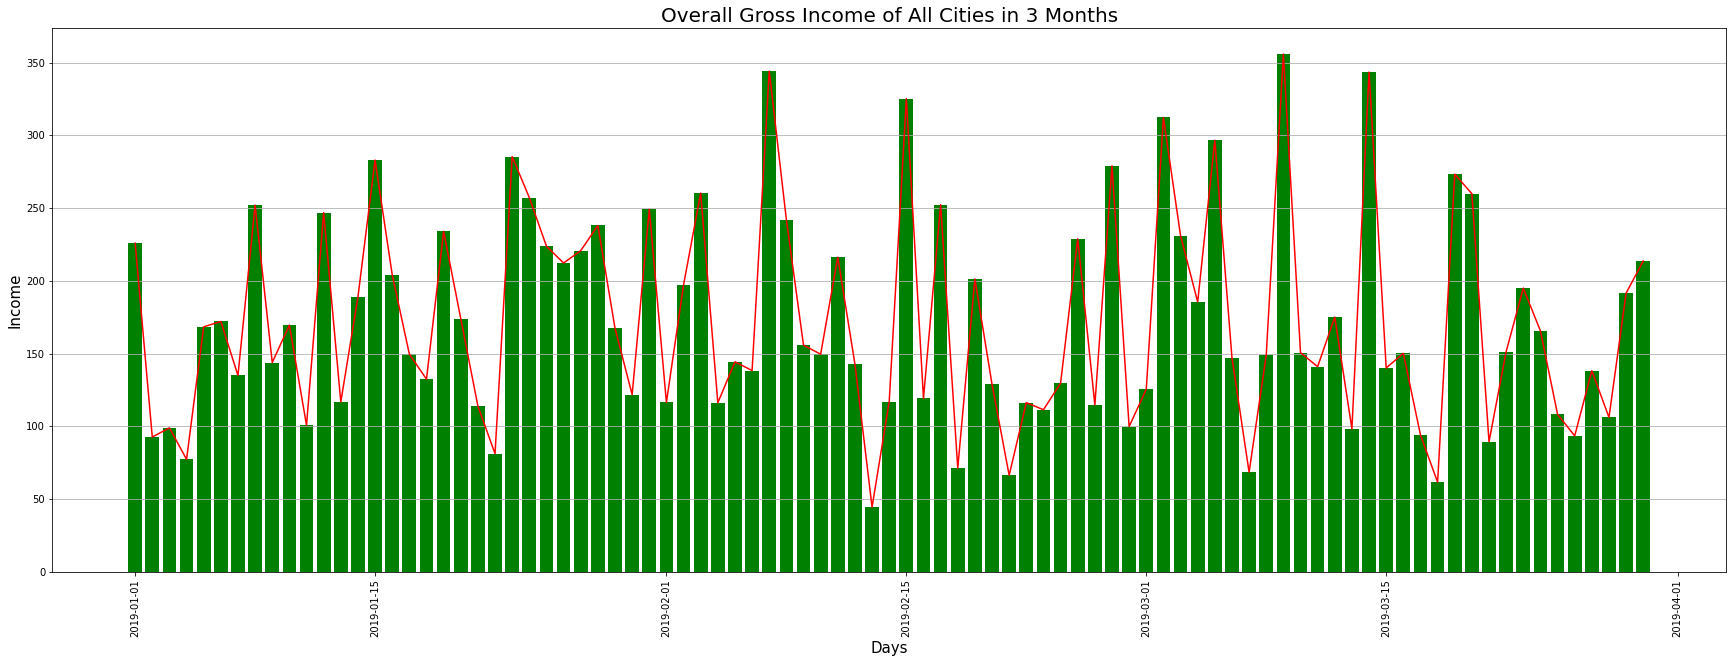

In [11]:
plt.figure(figsize=(30,10))
plt.plot(con['Date'], con['gross income'], color = 'red')
plt.xticks(rotation='vertical', size=10)
plt.xlabel('Days', size=15)
plt.ylabel('Income', size=15)
plt.title('Overall Gross Income of All Cities in 3 Months', size = 20)
plt.bar(con['Date'], con['gross income'], color = 'green')
plt.grid(axis='y')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f14b7afc990>],
      dtype=object)

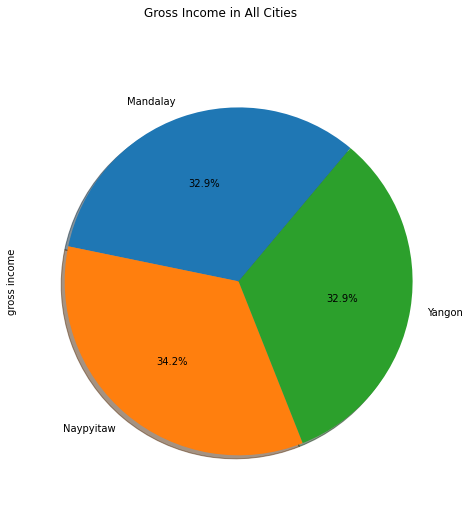

In [23]:
statc = df.groupby("City")["gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=50,figsize=(20,8), autopct='%1.1f%%', title = "Gross Income in All Cities")
statc

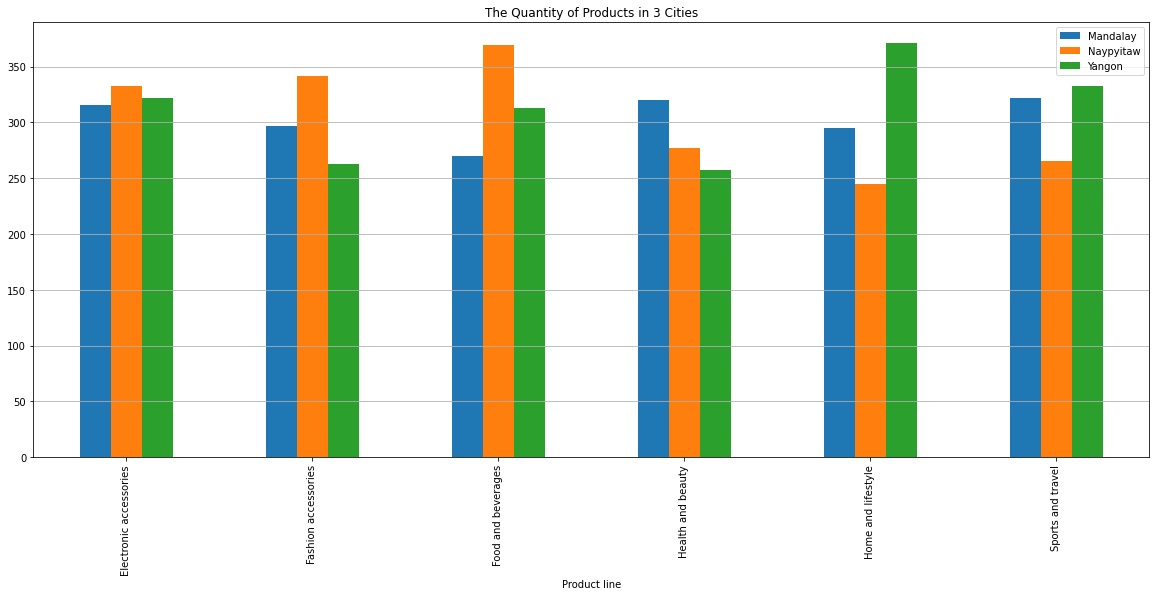

In [13]:
quant = df.groupby(["City", "Product line"]).sum()["Quantity"]
quant.unstack(level=0).plot(kind ='bar', figsize=(20,8), title="The Quantity level of all Products in 3 Cities")
plt.grid(axis='y')
plt.legend()

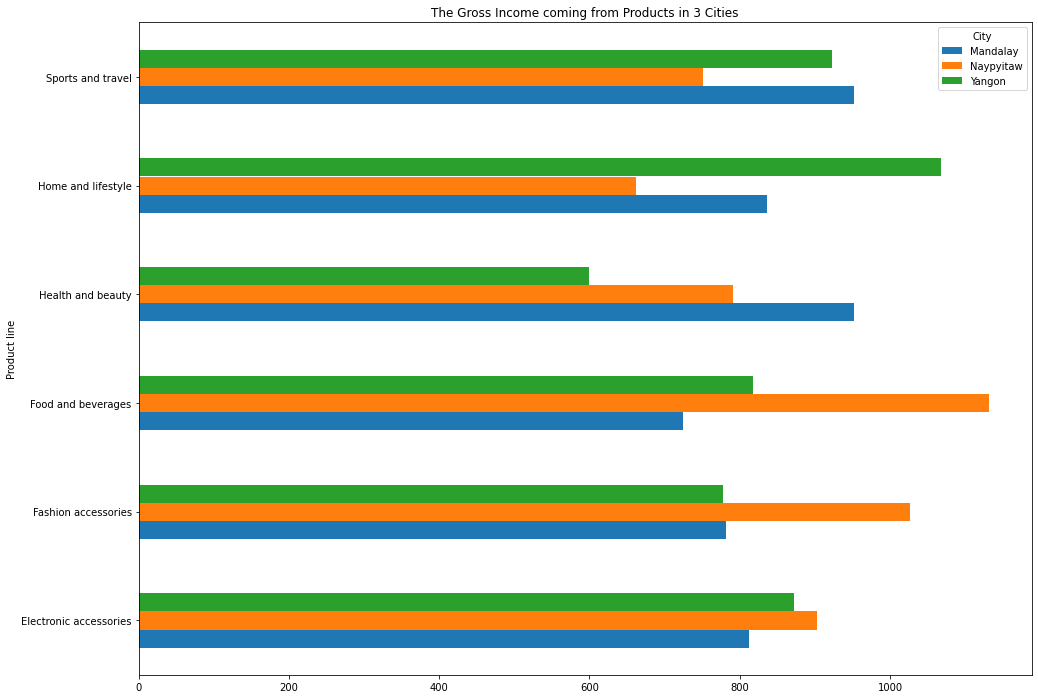

In [14]:
income = df.groupby(["City", "Product line"]).sum()["gross income"]
income.unstack(level=0).plot(kind='barh', figsize=(16,12),title="The Gross Income coming from Products in 3 Cities" )
plt.show()

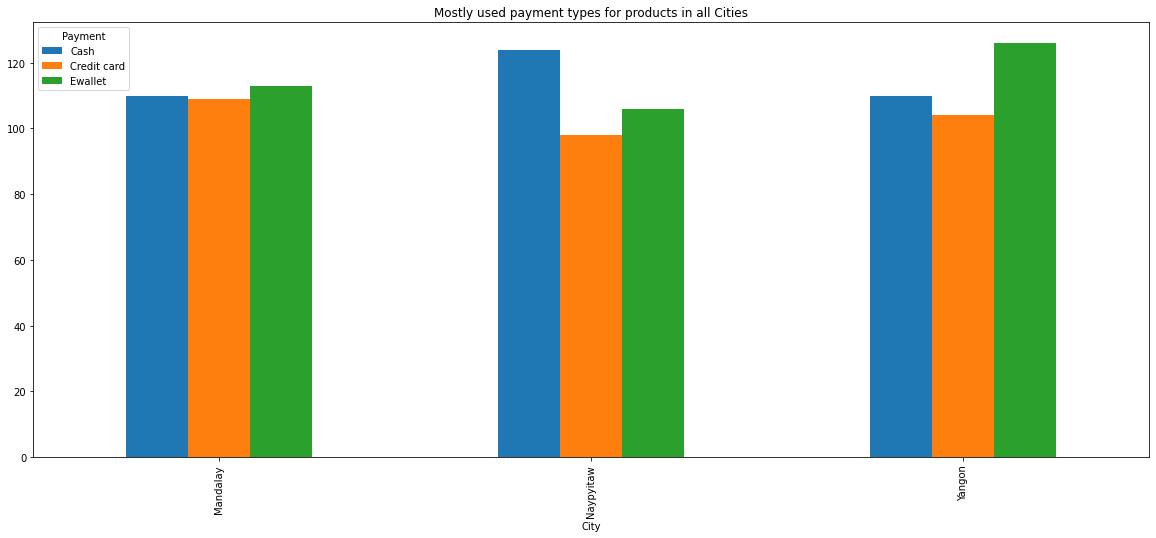

In [45]:
cash = df.groupby(['Payment', 'City'])['Product line'].count().unstack(level=0).plot(kind='bar', figsize=(20,8), title='Mostly used payment types for products in all Cities')

In [16]:
# product_m = df.loc[df["City"] == "Mandalay"]
# product_w = product_m.groupby('Product line')["Quantity","gross income"].sum()
# product_w.plot(kind='barh',title='Pruduct Line in Mandalay', figsize=(20,10));
# plt.grid(axis='x')

In [ ]:
# statm = product_m.groupby("Product line")["Quantity","gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=60,figsize=(25,9), autopct='%1.1f%%', title = "Pruduct Line in Mandalay")
# statm

In [ ]:
# product_n = df.loc[df["City"] == "Naypyitaw"]
# product_s = product_n.groupby('Product line')["Quantity","gross income"].sum()
# product_s.plot(kind='barh',title='Pruduct Line in Naypyitaw', figsize=(20,10));
# plt.grid(axis='x')

In [ ]:
# statn = product_n.groupby("Product line")["Quantity","gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=60,figsize=(25,10), autopct='%1.1f%%', title = "Pruduct Line in Naypyitaw")
# statn

In [ ]:
# product_y = df.loc[df["City"] == "Yangon"]
# product_d = product_y.groupby('Product line')["Quantity","gross income"].sum()
# product_d.plot(kind='barh',title='Pruduct Line in Yangon', figsize=(20,10));
# plt.grid(axis='x')

In [ ]:
# staty = product_y.groupby("Product line")["Quantity","gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=60,figsize=(25,10), autopct='%1.1f%%', title = "Pruduct Line in Yangon")
# staty

In [ ]:
# products = df.groupby("Product line")["Quantity", "gross income"].sum()
# products.plot(kind = 'barh', title="Product Line in All Cities", figsize=(20,10));
# plt.grid(axis='x')

In [ ]:
# statp = product_m.groupby("Product line")["Quantity","gross income"].sum().plot(kind='pie', subplots=True, shadow = True,startangle=0,figsize=(25,10), autopct='%1.1f%%', title = "Product Line in All Cities")
# statp

In [ ]:
# sm = df.loc[df["Product line"] == "Food and beverages"]
# sm1 = df.loc[df["Product line"] == "Fashion accessories"]
# sm2 = df.loc[df["Product line"] == "Electronic accessories"]
# sm3 = df.loc[df["Product line"] == "Sports and travel"]
# sm4 = df.loc[df["Product line"] == "Home and lifestyle"]
# sm5 = df.loc[df["Product line"] == "Health and beauty"]

# p,p1,p2,p3,p4,p5 = sm.groupby("Date").sum(),sm1.groupby("Date").sum(),sm2.groupby("Date").sum(),sm3.groupby("Date").sum(),sm4.groupby("Date").sum(),sm5.groupby("Date").sum()
# p,p1,p2,p3,p4,p5 = p.reset_index(),p1.reset_index(),p2.reset_index(),p3.reset_index(),p4.reset_index(),p5.reset_index()

In [ ]:
# plt.figure(figsize=(30,8))
# plt.bar(p['Date'], p['gross income'], color='red')
# plt.bar(p1['Date'], p1['gross income'], color='blue')
# plt.bar(p2['Date'], p2['gross income'], color='green')
# plt.bar(p3['Date'], p3['gross income'], color='yellow')
# plt.bar(p4['Date'], p4['gross income'], color='purple')
# plt.bar(p5['Date'], p5['gross income'], color='pink')
# plt.xticks(rotation='vertical', size=8)
# plt.show()

In [ ]:
# line = df.groupby('Product line')['gross income'].sum().plot(kind='bar',figsize=(16,7), title='Overall Gross Income in all Cities by Product line')
# line

In [ ]:
# m = df.loc[df["City"] == "Mandalay"]
# lineM = m.groupby('Product line')['gross income'].sum().plot(kind='bar', figsize=(16,7),title='Overall Gross Income in Mandalay by Product line', color='green')
# lineM

In [ ]:
# n = df.loc[df['City'] == "Naypyitaw"]
# lineN = n.groupby("Product line")['gross income'].sum().plot(kind='bar',figsize=(16,7),title='Overall Gross Income in Naypyitaw by Product line',color='purple')
# lineN

In [ ]:
# y = df.loc[df['City'] == "Yangon"]
# lineY = y.groupby("Product line")['gross income'].sum().plot(kind='bar',figsize=(16,7),title='Overall Gross Income in Yangon by Product line', color='orange')
# plt.show()

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14:43,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20:37,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4


In [ ]:
#

In [ ]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [ ]:
p

,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,2019-01-01,105.75,18,50.7630,1066.0230,1015.26,9.523810,50.7630,15.3
1,2019-01-02,41.66,6,12.4980,262.4580,249.96,4.761905,12.4980,5.6
2,2019-01-05,71.20,1,3.5600,74.7600,71.20,4.761905,3.5600,9.2
3,2019-01-06,130.42,15,54.9750,1154.4750,1099.50,9.523810,54.9750,19.5
4,2019-01-07,116.36,7,21.9110,460.1310,438.22,9.523810,21.9110,15.1
...,...,...,...,...,...,...,...,...,...
71,2019-03-25,94.82,10,22.9070,481.0470,458.14,9.523810,22.9070,17.4
72,2019-03-26,16.31,9,7.3395,154.1295,146.79,4.761905,7.3395,8.4
73,2019-03-27,242.73,18,42.3085,888.4785,846.17,23.809524,42.3085,34.3
74,2019-03-28,269.67,21,56.8130,1193.0730,1136.26,23.809524,56.8130,42.1


In [ ]:
df["Time"].value_counts()

In [ ]:
df["Payment"].value_counts()

In [ ]:
df["cogs"].value_counts()

In [ ]:
df["gross margin percentage"].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [ ]:
df["gross income"].value_counts()

10.3260    2
4.4640     2
4.1540     2
9.0045     2
22.4280    2
          ..
7.2135     1
19.5895    1
26.9150    1
24.2575    1
30.9190    1
Name: gross income, Length: 990, dtype: int64

In [ ]:
df["Rating"].value_counts()

6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64